In [68]:
#Importing essential libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
#importing titanic train dataset.

td = pd.read_csv('titanic_train.csv')

In [71]:
#checking training dataframe head.

td.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


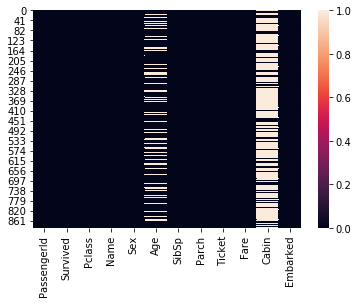

In [130]:
#using heatmap to check null values for data preprocessing.

sns.heatmap(td.isnull())

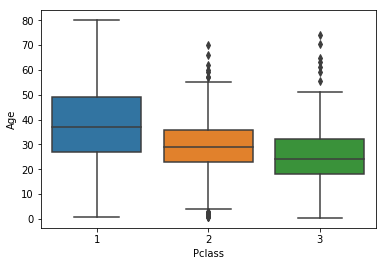

In [73]:
#using seaborn to create an age and Passenger class boxplot.

sns.boxplot(y = 'Age', x = 'Pclass', data = td)

In [74]:
#To eliminate null values from age column, creating this add_age function
#the function will add avg ages based on Passenger class average.

def add_age(col):
    age = col[0]
    cl = col[1]
    if pd.isnull(age):
        if cl == 1:
            return 41
        if cl == 2:
            return 28
        else:
            return 25
    else:
        return age

In [75]:
#applying add_age function to the age data column.

td['Age'] = td[['Age', 'Pclass']].apply(add_age, axis = 1)

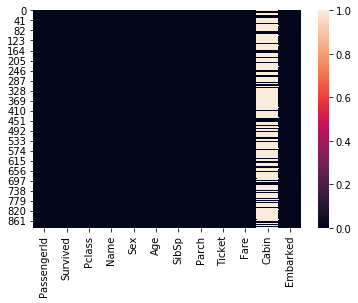

In [76]:
#checking effectiveness of the function application, using heatmap.

sns.heatmap(td.isnull())

In [77]:
#To eliminate null values from cabin column, creating this rem_cabin function
#the function will insert 0 if cabin value was null or set value to 1 if cabin value is not null.

def rem_cabin(col):
    cab = col[0]
    if pd.isnull(cab):
        return 0
    else:
        return 1
    

In [78]:
#applying rem_cabin function.

td['Cabin'] = td[['Cabin']].apply(rem_cabin, axis = 1)

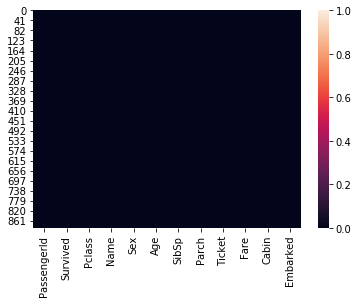

In [79]:
#checking effects of rem_cabin on dataframe, using heatmap.

sns.heatmap(td.isnull())

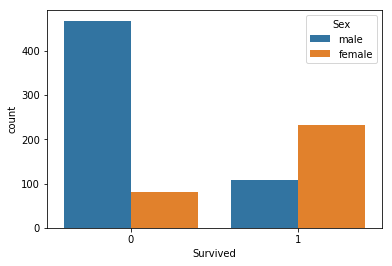

In [80]:
#some visualizations for count of passenger sex vs survival.

sns.countplot(x = 'Survived', data = td, hue = 'Sex')

In [134]:
#getting dummies for sex and embarked columns.

sex = pd.get_dummies(td['Sex'], drop_first= True)
embarked = pd.get_dummies(td['Embarked'], drop_first= True)

In [87]:
#dropping sex and embarked columns from main dataframe after creating dummy data.

td.drop(['Embarked', 'Sex'], axis = 1, inplace = True)

In [88]:
# concatinating dummy data to dataframe.

td = pd.concat([td,sex,embarked], axis = 1)

In [89]:
#importing train/test split.

from sklearn.model_selection import train_test_split

In [90]:
#Creating X by dropping training data's survived, Name, Ticket columns.

X = td.drop(['Survived', 'Name', 'Ticket'], axis = 1)

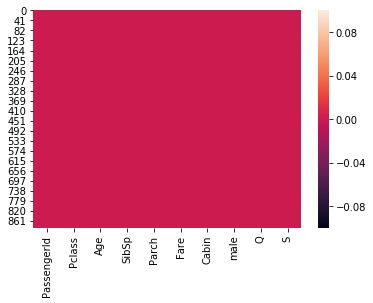

In [91]:
#checking if X has any null values.

sns.heatmap(X.isnull())

In [92]:
# creating y using training data 'survived' for label training.

y = td['Survived']

In [93]:
#checking y head.

y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [135]:
#importing logistic Regression from sklearn.
#creating logisticRegression instance.

from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()

In [97]:
#fitting X and y to logistic regression instance.

lrm.fit(X,y)

c:\users\shoby\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
# current lrm has fitted data and its ready for testing. importing test data.

In [99]:
#importing titanic test data from root.

test = pd.read_csv('titanic_test.csv')

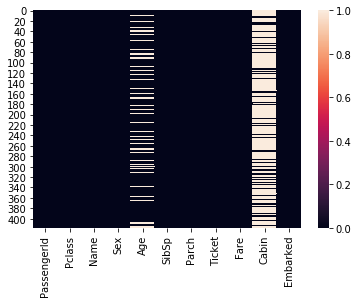

In [100]:
#checking heatmaps for null values visuals.

sns.heatmap(test.isnull())

In [101]:
#creating dummies for test data embarked and sex columns, same as training set.

embarked = pd.get_dummies(test['Embarked'], drop_first= True)
sex = pd.get_dummies(test['Sex'], drop_first= True)

In [104]:
#concatinating test dataset with dummies data.
#dropping sex and embarked after concatinating their dummies.

test = pd.concat([test,sex,embarked], axis = 1)
test.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [108]:
#applying rem_cabin to test set to remove nulls from cabin column.

test['Cabin'] = test[['Cabin']].apply(rem_cabin, axis = 1) #always apply to a list.

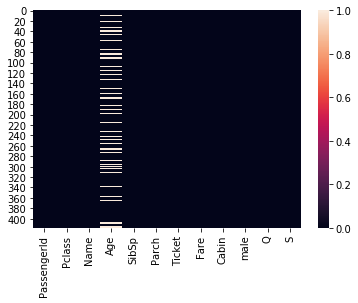

In [109]:
#checking if rem_cabin was effective.

sns.heatmap(test.isnull())

In [110]:
#checking head of test set.

test.head(2)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,0,1


In [136]:
#applying add_age to test dataset.

test['Age'] = test[['Age', 'Pclass']].apply(add_age, axis =1 )
test['Age'].fillna(0, inplace = True)

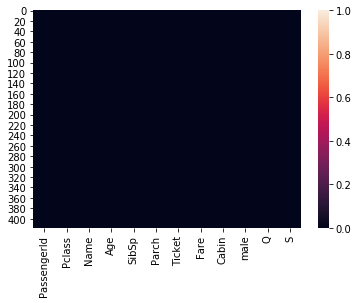

In [114]:
sns.heatmap(test.isnull())

In [115]:
#dropping tricket and Name columns as they are strings.

test.drop(['Ticket', 'Name'], axis =1, inplace = True)

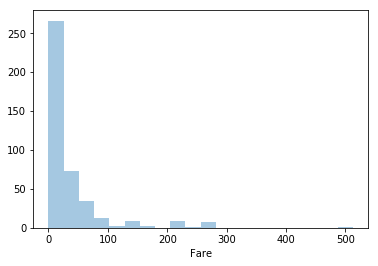

In [137]:
sns.distplot(test['Fare'], bins = 20, kde = False)

In [121]:
test.replace([np.inf, -np.inf], np.nan, inplace = True)

In [123]:
test.fillna(0, inplace = True)

In [124]:
#Predicting Logistic regression on test set.

pred = lrm.predict(test) 

In [125]:
#checking output of the prediction.

pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [126]:
#saving file for kaggle submission.

submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred})

In [127]:
filename = 'Titanic Predictions 2.csv'

In [128]:
submission.to_csv(filename, index = False)